## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice. 
print("There are", combined_data["Mouse ID"].nunique(), "mice in this population.")

There are 249 mice in this population.


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_duplicated = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
print("There are", clean_df["Mouse ID"].nunique(), "mice in this population.")

There are 248 mice in this population.


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each 
# regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = clean_df[{"Drug Regimen", "Tumor Volume (mm3)"}].groupby("Drug Regimen").mean()
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)" : "Mean"}, errors="raise")
summary_df["Median"] = clean_df[{"Drug Regimen", "Tumor Volume (mm3)"}].groupby("Drug Regimen").median()
summary_df["Variance"] = clean_df[{"Drug Regimen", "Tumor Volume (mm3)"}].groupby("Drug Regimen").var()
summary_df["StdDev"] = clean_df[{"Drug Regimen", "Tumor Volume (mm3)"}].groupby("Drug Regimen").std()
summary_df["SEM"] = clean_df[{"Drug Regimen", "Tumor Volume (mm3)"}].groupby("Drug Regimen").sem()

summary_df


,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_drug_df = clean_df[{"Drug Regimen", "Mouse ID"}].groupby("Drug Regimen").count().reset_index()
count_drug_df = count_drug_df.rename(columns={"Mouse ID":"Count"})
count_drug_df

,Drug Regimen,Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0, 0.5, 'Number of Measurements')

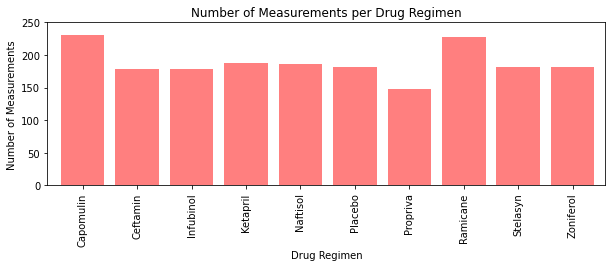

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen.
plt.figure(figsize=(10,3))
plt.bar(count_drug_df["Drug Regimen"], count_drug_df["Count"], color='r', alpha=0.5, align="edge")

# Set x axis and tick locations
x_axis = range(0, len(count_drug_df))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, count_drug_df["Drug Regimen"], rotation="vertical")

# Set the limits of the x axis
plt.xlim(-0.25, len(count_drug_df))

# Set the limits of the y axis
plt.ylim(0, max(count_drug_df["Count"])+20)

# Give the chart a title, x label, and y label
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice_df = clean_df.drop_duplicates("Mouse ID").reset_index()
gender_mice_df = gender_mice_df[{"Mouse ID", "Sex"}].groupby("Sex").count().reset_index()
gender_mice_df = gender_mice_df.rename(columns={"Mouse ID":"Count"})
gender_mice_df

,Sex,Count
0,Female,123
1,Male,125


([<matplotlib.patches.Wedge at 0x2c51f97ba30>,
 [Text(-0.7679021568231756, 0.7876079465992678, 'Female'),
  Text(0.7679021568231755, -0.7876079465992679, 'Male')],
 [Text(-0.4188557219035503, 0.42960433450869145, '49.6%'),
  Text(0.41885572190355025, -0.42960433450869157, '50.4%')])

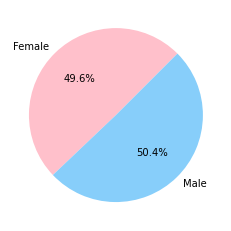

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen.
plt.pie(gender_mice_df["Count"], explode=(0, 0), labels=gender_mice_df["Sex"], 
        colors = ["pink", "lightskyblue"], autopct="%1.1f%%", shadow=False, startangle=45)

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_df = clean_df[{"Mouse ID", "Timepoint"}].groupby("Mouse ID").max()
last_clean_df = clean_df[{"Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"}]

for mouse in last_clean_df["Mouse ID"]:
    last_clean_df.loc[last_clean_df["Mouse ID"] == mouse, "Last"] = last_time_df.loc[mouse, "Timepoint"]

last_clean_df = last_clean_df[last_clean_df["Timepoint"] == last_clean_df["Last"]].reset_index()
last_clean_df = last_clean_df[{"Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"}]
last_clean_df = last_clean_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]]

last_clean_df = last_clean_df[last_clean_df["Drug Regimen"]
                              .isin({"Capomulin", "Ramicane", "Infubinol", "Ceftamin"})].reset_index()

last_clean_df

,index,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,0,k403,Ramicane,22.050126,45
1,1,s185,Capomulin,23.343598,45
2,2,x401,Capomulin,28.484033,45
3,3,m601,Capomulin,28.430964,45
4,4,g791,Ramicane,29.128472,45
...,...,...,...,...,...
95,234,x822,Ceftamin,61.386660,45
96,236,y163,Infubinol,67.685569,45
97,240,y769,Ceftamin,68.594745,45
98,241,y865,Ceftamin,64.729837,45


In [17]:
boxplot_df = last_clean_df[{"Drug Regimen", "Tumor Volume (mm3)"}].groupby("Drug Regimen").mean()
boxplot_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,36.667568
Ceftamin,57.753977
Infubinol,58.178246
Ramicane,36.191390


In [18]:
# Put treatments into a dataframe
capomulin_df = last_clean_df["Tumor Volume (mm3)"][last_clean_df["Drug Regimen"] == "Capomulin"]
ramicane_df = last_clean_df["Tumor Volume (mm3)"][last_clean_df["Drug Regimen"] == "Ramicane"]
infubinol_df = last_clean_df["Tumor Volume (mm3)"][last_clean_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = last_clean_df["Tumor Volume (mm3)"][last_clean_df["Drug Regimen"] == "Ceftamin"]

# Calculate Quartiles for Capomulin
capomulin_quartiles = capomulin_df.quantile([.25,.5,.75])
capomulin_quartiles
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lb = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_ub = capomulin_upperq + (1.5 * capomulin_iqr)

# Calculate Quartiles for Ramicane
ramicane_quartiles = ramicane_df.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lb = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_ub = ramicane_upperq + (1.5 * ramicane_iqr)

# Calculate Quartiles for Infubinol
infubinol_quartiles = infubinol_df.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lb = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_ub = infubinol_upperq + (1.5 * infubinol_iqr)

# Calculate Quartiles for Ceftamin
ceftamin_quartiles = ceftamin_df.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lb = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_ub = ceftamin_upperq + (1.5 * ceftamin_iqr)

# Print Information
print("------------------------------------")
print("Tumor Volume (mm3): mice on Capomulin")
print("")
print(f" - The lower quartile of temperatures is: {capomulin_lowerq}")
print(f" - The upper quartile of temperatures is: {capomulin_upperq}")
print(f" - The interquartile range of temperatures is: {capomulin_iqr}")
print(f" - The the median of temperatures is: {capomulin_quartiles[0.5]} ")
print("")
print(f" - Values below {capomulin_lb} could be outliers.")
print(f" - Values above {capomulin_ub} could be outliers.")

print("------------------------------------")
print("Tumor Volume (mm3): mice on Ramicane")
print("")
print(f" - The lower quartile of temperatures is: {ramicane_lowerq}")
print(f" - The upper quartile of temperatures is: {ramicane_upperq}")
print(f" - The interquartile range of temperatures is: {ramicane_iqr}")
print(f" - The the median of temperatures is: {ramicane_quartiles[0.5]} ")
print("")
print(f" - Values below {ramicane_lb} could be outliers.")
print(f" - Values above {ramicane_ub} could be outliers.")

print("------------------------------------")
print("Tumor Volume (mm3): mice on Infubinol")
print("")
print(f" - The lower quartile of temperatures is: {infubinol_lowerq}")
print(f" - The upper quartile of temperatures is: {infubinol_upperq}")
print(f" - The interquartile range of temperatures is: {infubinol_iqr}")
print(f" - The the median of temperatures is: {infubinol_quartiles[0.5]} ")
print("")
print(f" - Values below {infubinol_lb} could be outliers.")
print(f" - Values above {infubinol_ub} could be outliers.")

print("------------------------------------")
print("Tumor Volume (mm3): mice on Ceftamin")
print("")
print(f" - The lower quartile of temperatures is: {ceftamin_lowerq}")
print(f" - The upper quartile of temperatures is: {ceftamin_upperq}")
print(f" - The interquartile range of temperatures is: {ceftamin_iqr}")
print(f" - The the median of temperatures is: {ceftamin_quartiles[0.5]} ")
print("")
print(f" - Values below {ceftamin_lb} could be outliers.")
print(f" - Values above {ceftamin_ub} could be outliers.")
print("------------------------------------")

------------------------------------
Tumor Volume (mm3): mice on Capomulin

 - The lower quartile of temperatures is: 32.37735684
 - The upper quartile of temperatures is: 40.1592203
 - The interquartile range of temperatures is: 7.781863460000004
 - The the median of temperatures is: 38.1251644 

 - Values below 20.70456164999999 could be outliers.
 - Values above 51.83201549 could be outliers.
------------------------------------
Tumor Volume (mm3): mice on Ramicane

 - The lower quartile of temperatures is: 31.56046955
 - The upper quartile of temperatures is: 40.65900627
 - The interquartile range of temperatures is: 9.098536719999998
 - The the median of temperatures is: 36.56165229 

 - Values below 17.912664470000003 could be outliers.
 - Values above 54.30681135 could be outliers.
------------------------------------
Tumor Volume (mm3): mice on Infubinol

 - The lower quartile of temperatures is: 54.04860769
 - The upper quartile of temperatures is: 65.52574285
 - The interquar

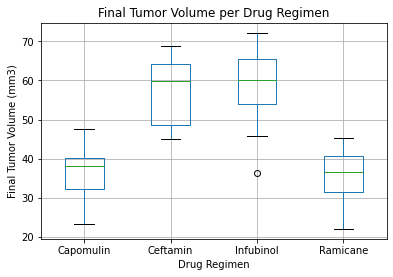

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

last_clean_df.boxplot(by="Drug Regimen", column=["Tumor Volume (mm3)"])
plt.suptitle('')
plt.title('Final Tumor Volume per Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

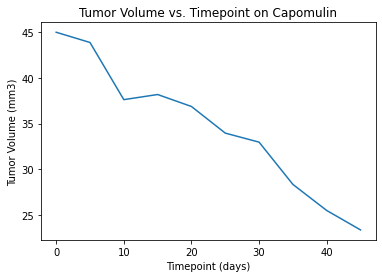

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Grab data for one mouse treated with Capomulin
plot_data = clean_df[clean_df["Mouse ID"] == "s185"][{"Timepoint", "Tumor Volume (mm3)"}]
x_axis = plot_data["Timepoint"]
y_axis = plot_data["Tumor Volume (mm3)"]

# Plot the chart
plt.plot(x_axis, y_axis)

# Add labels to X and Y axes :: Add title
plt.title("Tumor Volume vs. Timepoint on Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

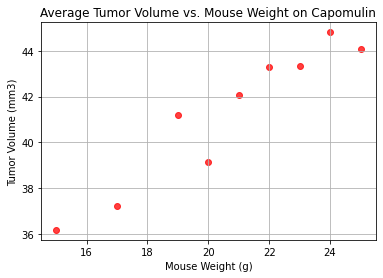

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Gather the required data
plot_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"][
    {"Weight (g)", "Tumor Volume (mm3)"}].groupby("Weight (g)").mean().reset_index()
x_axis = plot_data["Weight (g)"]
y_axis = plot_data["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", alpha=0.75)
plt.grid(True)

# Add labels to X and Y axes :: Add title
plt.title("Average Tumor Volume vs. Mouse Weight on Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [23]:
correlation = st.pearsonr(plot_data["Weight (g)"],plot_data["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95


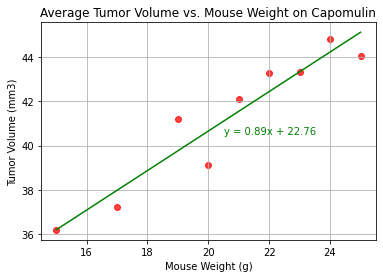

In [24]:
# Required Data
plot_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"][
    {"Weight (g)", "Tumor Volume (mm3)"}].groupby("Weight (g)").mean().reset_index()
x_axis = plot_data["Weight (g)"]
y_axis = plot_data["Tumor Volume (mm3)"]

# Line calculations
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the Graph
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", alpha=0.75)
plt.grid(True)
plt.plot(x_axis,regress_values,"g-")
plt.annotate(line_eq,(20.5,40.5),fontsize=10,color="g")

# Add labels to X and Y axes :: Add title
plt.title("Average Tumor Volume vs. Mouse Weight on Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()